## DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
from datetime import datetime as dt

In [2]:
df = pd.read_csv('./data/data.csv')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [6]:
df.isnull().sum()/df.shape[0]

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            0.040672
Delivery_person_Ratings        0.041857
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    0.037974
Time_Order_picked              0.000000
Weather_conditions             0.013514
Road_traffic_density           0.013184
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.021784
Festival                       0.005002
City                           0.026325
Time_taken (min)               0.000000
dtype: float64

There are about 4% missing values in the dataframe. We can drop the missing values for now from a copy of the dataset and check peformance. If we run into some issues, we can try to come up with strategies to handle the missing values.

In [7]:
delivery_df = df.copy()
delivery_df = delivery_df.dropna()

In [8]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41359 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41359 non-null  object 
 1   Delivery_person_ID           41359 non-null  object 
 2   Delivery_person_Age          41359 non-null  float64
 3   Delivery_person_Ratings      41359 non-null  float64
 4   Restaurant_latitude          41359 non-null  float64
 5   Restaurant_longitude         41359 non-null  float64
 6   Delivery_location_latitude   41359 non-null  float64
 7   Delivery_location_longitude  41359 non-null  float64
 8   Order_Date                   41359 non-null  object 
 9   Time_Orderd                  41359 non-null  object 
 10  Time_Order_picked            41359 non-null  object 
 11  Weather_conditions           41359 non-null  object 
 12  Road_traffic_density         41359 non-null  object 
 13  Vehicle_conditio

In [9]:
# Check the number of unique values for ID. Although it doesn't seem to be concentrated
# but in case it is, we can use it as a feature or else drop it.

delivery_df.ID.nunique()

41359

In [10]:
# As we can see the number of unique counts is same as number of rows. So we will proceed with dropping the column

delivery_df.drop(columns = 'ID', axis=1, inplace=True)

In [11]:
delivery_df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Observations and Key takeaways:

- Can get the order location/city from the 'Delivery_person_ID'
- `'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'` indicate the exact location of restaurant and delivery. We will use that to calculate the `Order_Distance`.
- From DataFrame.info(), we noticed that columns `'Order_Date', 'Time_Orderd', 'Time_Order_picked'` are of object type. Will convert them to Datetime object and extract the Month and Year of order for some insights on how delivery time has changed over time.

In [12]:
cat_columns = ['Weather_conditions', 'Road_traffic_density', 
           'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 
           'multiple_deliveries', 'Festival', 'City']

In [13]:
for col in cat_columns:
    print(delivery_df[col].value_counts())
    print("-"*40)

Fog           7115
Stormy        6995
Cloudy        6947
Sandstorms    6851
Windy         6839
Sunny         6612
Name: Weather_conditions, dtype: int64
----------------------------------------
Low       13980
Jam       13155
Medium    10123
High       4101
Name: Road_traffic_density, dtype: int64
----------------------------------------
0    13921
2    13752
1    13686
Name: Vehicle_condition, dtype: int64
----------------------------------------
Meal      10419
Snack     10416
Drinks    10301
Buffet    10223
Name: Type_of_order, dtype: int64
----------------------------------------
motorcycle          24294
scooter             13720
electric_scooter     3345
Name: Type_of_vehicle, dtype: int64
----------------------------------------
1.0    26168
0.0    12973
2.0     1881
3.0      337
Name: multiple_deliveries, dtype: int64
----------------------------------------
No     40526
Yes      833
Name: Festival, dtype: int64
----------------------------------------
Metropolitian    31816
Ur

We can first check the distribution of numeric columns.

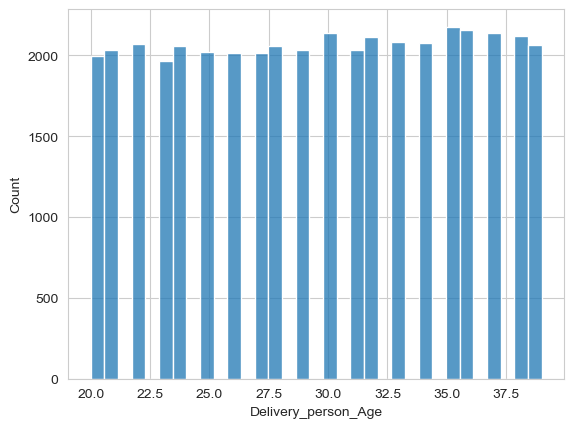

In [14]:
fig, ax = plt.subplots()
sns.histplot(data = delivery_df, x = 'Delivery_person_Age')
plt.show()

Quite a uniform distribution of ages among delivery partners

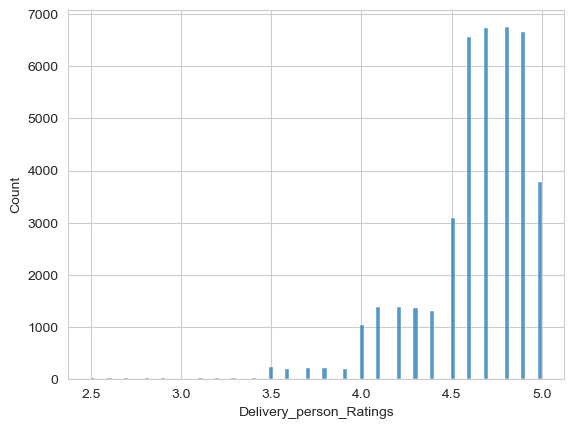

In [15]:
fig, ax = plt.subplots()
sns.histplot(data = delivery_df, x = 'Delivery_person_Ratings')
plt.show()

The data shows that majority of the ratings are on the higher end of the spectrum as is generally observed.

Lets have a quick look at how the delivery times vary with age and ratings

In [16]:
age_group = delivery_df.groupby('Delivery_person_Age')['Time_taken (min)'].median()
age_df = pd.DataFrame(age_group)

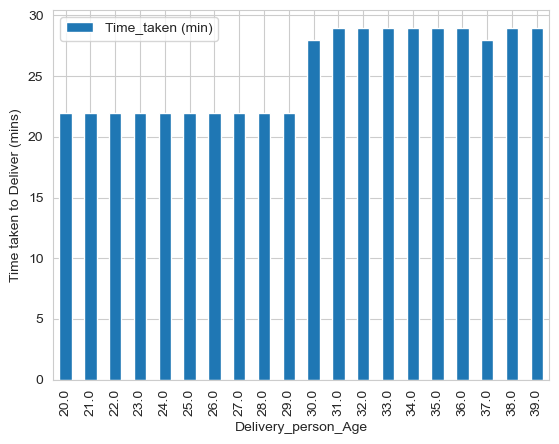

In [17]:
age_df.plot(kind = 'bar')
plt.ylabel('Time taken to Deliver (mins)')
plt.show()



Delivery agents younger than 30 take on average less time than their older counterparts.

In [18]:
ratings_group = delivery_df.groupby('Delivery_person_Ratings')['Time_taken (min)'].median()
ratings_df = pd.DataFrame(ratings_group)

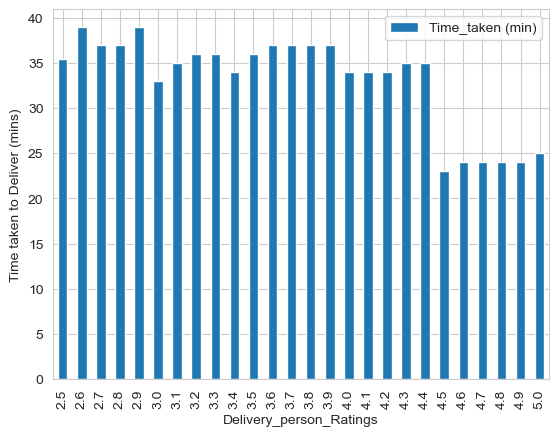

In [19]:
ratings_df.plot(kind = 'bar')
plt.ylabel('Time taken to Deliver (mins)')
plt.show()

As expected, delivery times for higher ratings are lower. 

In [20]:
delivery_df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)'],
      dtype='object')

There are multiple ways to use the latitude and longitude data present in the table. For our case, we can use it to calculate the Order Distance.

In [21]:
def deg2rad(deg):
    """
    Returns the radian value of angle
    """
    import math
    return deg*math.pi/180


def getDistancefromLatLonginKm(lat1, lon1, lat2, lon2):
    """
    Returns the Distance in Kms upto 2 decimal places between 2 points with Latitude and Longitude
    """
    import math
    earth_radius = 6371 # Radius of earth in kms
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    
    a = math.sin(dlat/2)**2 + math.cos(deg2rad(lat1))*math.cos(deg2rad(lat2))*math.sin(dlon/2)**2
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = earth_radius*c
    
    return round(d, 2)

In [22]:
delivery_df['Delivery_distance'] = delivery_df.apply(
    lambda x: getDistancefromLatLonginKm(x['Restaurant_latitude'], x['Restaurant_longitude'], x['Delivery_location_latitude'], x['Delivery_location_longitude']),
    axis=1
)

Now, we can drop the latitude and longitude columns as we already the distance.

In [23]:
delivery_df.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis = 1, inplace = True)
delivery_df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_distance
0,DEHRES17DEL01,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.28
1,KOCRES16DEL01,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.24
2,PUNERES13DEL03,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.79
3,LUDHRES15DEL02,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.93
4,KNPRES14DEL02,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.40


In [24]:
delivery_df['Delivery_distance'].describe()

count    41359.000000
mean        26.915510
std        298.814462
min          1.470000
25%          4.660000
50%          9.270000
75%         13.740000
max       6884.730000
Name: Delivery_distance, dtype: float64

As we can see there are outliers in the `Delivery_distance` column data.

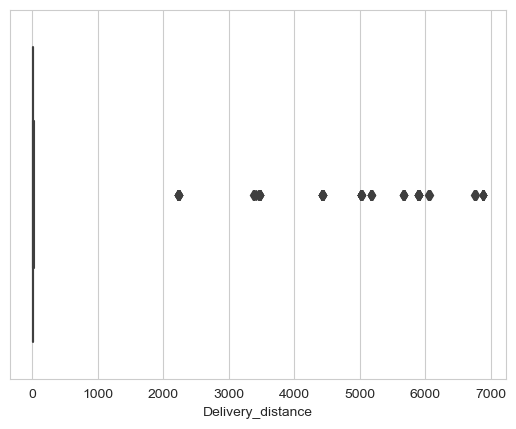

In [25]:
sns.boxplot(data = delivery_df, x = 'Delivery_distance')
plt.show()

In [26]:
q = delivery_df['Delivery_distance'].quantile(0.99)
delivery_df = delivery_df[delivery_df['Delivery_distance'] < q ]
delivery_df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Delivery_distance
count,40854.000000,40854.000000,40854.000000,40854.000000,40854.000000,40854.000000
mean,29.610124,4.633590,0.995545,0.747295,26.523302,9.678763
std,5.763449,0.315439,0.817842,0.572698,9.325957,5.535906
min,20.000000,2.500000,0.000000,0.000000,10.000000,1.470000
25%,25.000000,4.500000,0.000000,0.000000,19.000000,4.660000
50%,30.000000,4.700000,1.000000,1.000000,26.000000,9.220000
75%,35.000000,4.900000,2.000000,1.000000,33.000000,13.630000
max,39.000000,5.000000,2.000000,3.000000,54.000000,20.830000


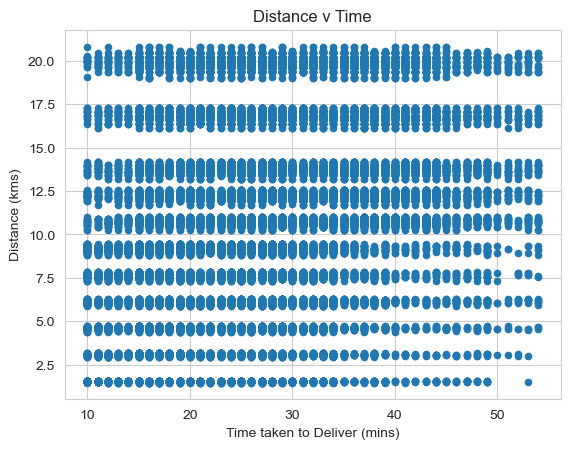

In [27]:
distance_df = delivery_df[['Delivery_distance', 'Time_taken (min)']].copy()

distance_df.plot(kind = 'scatter', x = 'Time_taken (min)', y = 'Delivery_distance')
plt.xlabel('Time taken to Deliver (mins)')
plt.ylabel('Distance (kms)')
plt.title('Distance v Time')
plt.show()

There doesn't seem to be any specific direct correlation between Distance and time taken to deliver.

In [28]:
delivery_df['Order_Date'] = pd.to_datetime(delivery_df['Order_Date'])

C:\Users\Abhijit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Abhijit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Abhijit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Abhijit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-02-2022' in DD/MM/YYYY format. Provide format o

In [29]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40854 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_ID       40854 non-null  object        
 1   Delivery_person_Age      40854 non-null  float64       
 2   Delivery_person_Ratings  40854 non-null  float64       
 3   Order_Date               40854 non-null  datetime64[ns]
 4   Time_Orderd              40854 non-null  object        
 5   Time_Order_picked        40854 non-null  object        
 6   Weather_conditions       40854 non-null  object        
 7   Road_traffic_density     40854 non-null  object        
 8   Vehicle_condition        40854 non-null  int64         
 9   Type_of_order            40854 non-null  object        
 10  Type_of_vehicle          40854 non-null  object        
 11  multiple_deliveries      40854 non-null  float64       
 12  Festival                 40854 n

In [30]:
def transform_time_columns(list_to_clean: list):
    
    for i, x in enumerate(list_to_clean):
        if ':' not in str(x):
            list_to_clean[i] = ''

    for i, x in enumerate(list_to_clean):
        if x.count(':') > 1:
            list_to_clean[i]= x[:5]

    for i, x in enumerate(list_to_clean):
        if x != '':
            hour = float(x[:2])
            mins = float(x[3:])

            list_to_clean[i] = round(hour + mins/60, 2)
            
    return list_to_clean

Now we use the `transform_time_columns` to clean the columns having time stamps

In [31]:
time_ordered = list(delivery_df['Time_Orderd'])
time_picked = list(delivery_df['Time_Order_picked'])

delivery_df['Time_Orderd_num'] = transform_time_columns(time_ordered)
delivery_df['Time_Order_picked_num'] = transform_time_columns(time_picked)

delivery_df = delivery_df.mask(delivery_df == '')
delivery_df.dropna(axis=0, inplace=True)


delivery_df['Time_to_pick'] = (delivery_df['Time_Order_picked_num'] - delivery_df['Time_Orderd_num'])*60
delivery_df['Time_to_pick'] = np.around(delivery_df['Time_to_pick'].astype(np.double),3)

delivery_df.drop(columns = ['Time_Orderd_num', 'Time_Order_picked_num'], axis = 1, inplace = True)

In [32]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33378 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_ID       33378 non-null  object        
 1   Delivery_person_Age      33378 non-null  float64       
 2   Delivery_person_Ratings  33378 non-null  float64       
 3   Order_Date               33378 non-null  datetime64[ns]
 4   Time_Orderd              33378 non-null  object        
 5   Time_Order_picked        33378 non-null  object        
 6   Weather_conditions       33378 non-null  object        
 7   Road_traffic_density     33378 non-null  object        
 8   Vehicle_condition        33378 non-null  int64         
 9   Type_of_order            33378 non-null  object        
 10  Type_of_vehicle          33378 non-null  object        
 11  multiple_deliveries      33378 non-null  float64       
 12  Festival                 33378 n

As we already have the `Time_to_pick` information, we can drop the `Time_Order_picked` column as it be repeated information.

In [33]:
delivery_df.drop(columns = ['Time_Order_picked'], axis = 1, inplace = True)

In [34]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33378 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_ID       33378 non-null  object        
 1   Delivery_person_Age      33378 non-null  float64       
 2   Delivery_person_Ratings  33378 non-null  float64       
 3   Order_Date               33378 non-null  datetime64[ns]
 4   Time_Orderd              33378 non-null  object        
 5   Weather_conditions       33378 non-null  object        
 6   Road_traffic_density     33378 non-null  object        
 7   Vehicle_condition        33378 non-null  int64         
 8   Type_of_order            33378 non-null  object        
 9   Type_of_vehicle          33378 non-null  object        
 10  multiple_deliveries      33378 non-null  float64       
 11  Festival                 33378 non-null  object        
 12  City                     33378 n

We can extract the city of order from the Delivery_person_ID feature.

In [35]:
delivery_df.Delivery_person_ID.head()

0     DEHRES17DEL01
1     KOCRES16DEL01
2    PUNERES13DEL03
3    LUDHRES15DEL02
4     KNPRES14DEL02
Name: Delivery_person_ID, dtype: object

As we can see that the ID column has the text 'RES' after the city name abbr. So we can use the slice till the text 'RES'. 

In [36]:
cities = list(delivery_df['Delivery_person_ID'])
cities = [x[:x.find('RES')] for x in cities]

delivery_df['City'] = cities
delivery_df.drop(columns = 'Delivery_person_ID', axis = 1, inplace = True)

In [37]:
delivery_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_distance,Time_to_pick
0,36.0,4.2,2022-12-02,21:55,Fog,Jam,2,Snack,motorcycle,3.0,No,DEH,46,10.28,15.0
1,21.0,4.7,2022-02-13,14:55,Stormy,High,1,Meal,motorcycle,1.0,No,KOC,23,6.24,9.6
2,23.0,4.7,2022-04-03,17:30,Sandstorms,Medium,1,Drinks,scooter,1.0,No,PUNE,21,13.79,10.2
3,34.0,4.3,2022-02-13,09:20,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,LUDH,20,2.93,10.2
4,24.0,4.7,2022-02-14,19:50,Fog,Jam,1,Snack,scooter,1.0,No,KNP,41,19.40,15.0


In [38]:
delivery_df.Order_Date.dtypes

dtype('<M8[ns]')

In [43]:
delivery_df['Day'] = delivery_df['Order_Date'].dt.day
delivery_df['Month'] = delivery_df['Order_Date'].dt.month

In [44]:
# As we have only one year of data, using this as a predictor would not make any sense as new cases mostly will have latest date years.

delivery_df.drop(columns = 'Order_Date', axis = 1, inplace = True)

In [45]:
delivery_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_distance,Time_to_pick,Day,Month
0,36.0,4.2,21:55,Fog,Jam,2,Snack,motorcycle,3.0,No,DEH,46,10.28,15.0,2,12
1,21.0,4.7,14:55,Stormy,High,1,Meal,motorcycle,1.0,No,KOC,23,6.24,9.6,13,2
2,23.0,4.7,17:30,Sandstorms,Medium,1,Drinks,scooter,1.0,No,PUNE,21,13.79,10.2,3,4
3,34.0,4.3,09:20,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,LUDH,20,2.93,10.2,13,2
4,24.0,4.7,19:50,Fog,Jam,1,Snack,scooter,1.0,No,KNP,41,19.40,15.0,14,2


In [51]:
time_of_day = list(delivery_df['Time_Orderd'])

for i, x in enumerate(time_of_day):
    time_of_day[i] = float(x[:2]) + float(x[3:])/60
    
for i, x in enumerate(time_of_day):
    if 0 < x <= 6:
        time_of_day[i] = 'Early Morning'
    elif 6 < x <= 12:
        time_of_day[i] = 'Morning'
    elif 12 < x <= 18:
        time_of_day[i] = 'Evening'
    elif 18 < x <= 24:
        time_of_day[i] = 'Night'
        
delivery_df['Time_of_Day_Ordered'] = time_of_day
delivery_df['Time_of_Day_Ordered'].value_counts()

Night      20890
Evening     6518
Morning     5970
Name: Time_of_Day_Ordered, dtype: int64

In [52]:
delivery_df.drop(columns = 'Time_Orderd', axis = 1, inplace = True)

In [53]:
delivery_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_distance,Time_to_pick,Day,Month,Time_of_Day_Ordered
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,DEH,46,10.28,15.0,2,12,Night
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,KOC,23,6.24,9.6,13,2,Evening
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,PUNE,21,13.79,10.2,3,4,Evening
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,LUDH,20,2.93,10.2,13,2,Morning
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,KNP,41,19.40,15.0,14,2,Night


In [54]:
delivery_df.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken (min)           0
Delivery_distance          0
Time_to_pick               0
Day                        0
Month                      0
Time_of_Day_Ordered        0
dtype: int64

In [55]:
delivery_df.shape

(33378, 16)

In [56]:
delivery_df.to_csv('./data/data_cleaned.csv')